# <center>Laboratorium 5<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.

***Materiały przygotowujące:***


In [1]:
import main
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt

def PolyCoefficients(x, coeffs):
    """ Returns a polynomial for ``x`` values for the ``coeffs`` provided.
    The coefficients  must be in ascending order (``x**0`` to ``x**o``).
    """
    o = len(coeffs)
    y = 0
    for i in range(o):
        y += coeffs[i]*x**i
    return y

***Zadanie 1.***  
Zaimplementuj interpolacje pierwszego stopnia. Jako dane wejściowe dane są dwa wektory: argumentów oraz wartości funkcji. Funkcja ma zwracać współczynniki funkcji liniowych w poszczególnych przedziałach.

***Podpowiedź***

poszczególne współczynniki przyjmują wartość:

$ a_k=\frac{y_{k+1}-y_k}{x_{k+1}-x_k}$

$ b_k=y_k-a_k*x_k$

***Przykład***


In [6]:
# x=np.array([1,2,3])
# y=np.array([5,7,6])
#
# a,b = main.first_spline(x,y)
# f = [[b[i],a[i]] for i in range(len(a))]
#
# for i in range(len(x)-1):
#     x_new = np.linspace(x[i], x[i+1],1000)
#     plt.plot(x_new, PolyCoefficients(x_new, f[i]))

In [2]:
def f_deg_interp(x,y) ->[list,list]:
    """
    interpolacja liniowa pierwszego stopnia
    :param x: iksy
    :param y: ygreki
    :return: współczynniki a i współczynniki b
    """
    a_s = []
    b_s = []
    for i in range(len(x)-1):
        a_s.append((y[i+1]-y[i])/(x[i+1]-x[i]))
        b_s.append(y[i] - a_s[i]*x[i])
    return a_s,b_s

***Zadanie 2.***  
Korzystając z funkcji z pakietu [scipy.interpolate.splprep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep), funkcji zaimplementowanej w Zadaniu 1 oraz interpolacji barycentrycznej z węzłami równoodległymi (korzystając z kodu z poprzedniego zadania) dokonaj interpolacji funkcji: 
    
### $ f(x) = \frac{1}{25x^2+1}$

W przedziale \[-1, 1\]

dla różnych ilości wartości węzłów: 5, 10, 15, 20, 50, 100, 1000

Dokonaj porównania wyników otrzymanych:  
Wykorzystując funkcję z ubiegłego tygodnia, ocenić jakość interpolacji funkcji spline pierwszego stopnia z wartościami danej funkcji.
Sprawdź czas wykonywania się poszczególnych elementów oraz ilość pamięci użytej 

In [9]:
from scipy.interpolate import splprep, splev
%load_ext memory_profiler

fun = lambda x: 1/(25 * x**2 +1)

def lin_interp(n, fun):
    x = np.linspace(-1+1e-6,1-1e-6,n)
    y = fun(x)
    a,b = f_deg_interp(x,y)
    coef = [[b[i],a[i]] for i in range(len(a))]
    out_x = []
    y_lin =[]
    for i in range(len(x)-1):
        x_new = np.linspace(x[i], x[i+1],50)
        out_x.extend(x_new)
        y_lin.extend(PolyCoefficients(x_new, coef[i]))
    return out_x, y_lin

def bar_interp(n,fun):
    x_out = np.linspace(-1+1e-4,1-1e-4,1000)
    x = np.linspace(-1+1e-5,1-1e-5,n)
    y = fun(x)
    weight = main.bar_czeb_weights(n-1)
    y_out = main.barycentric_inte(x,y,weight,x_out)
    return x_out, y_out

def scipy_interp(n,fun):
    x = np.linspace(-1,1,n)
    x_out = np.linspace(-1+1e-4,1-1e-4,1000)
    y = fun(x)
    tck, u, *_ = splprep([x,y], s=0,k=3)
    x_out,y_out = splev(x_out, tck)[:2]
    ind_min = 0
    ind_max = 1000
    for i in range(len(x_out)):
        if x_out[i] > -1:
            ind_min = i
            break
    for i in reversed(range(len(x_out))):
        if x_out[i] < 1:
            ind_max = i
            break
    x_out = np.array(x_out[ind_min:ind_max])
    y_out = np.array(y_out[ind_min:ind_max])
    return x_out, y_out
names = ['linear', 'baricentric', 'splne']
functions = [lin_interp, bar_interp, scipy_interp]

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


In [ ]:
for n in [5, 10, 15, 20, 50, 100, 1000]:
    for i in range(3):
        s_time = %timeit -r 1 -n 1 -o functions[i](n,fun)
        print(f'metoda = {names[i]}\n',
              f'n = {n}\n'
              f'czas wykonania interpolacji = {s_time.average} s\n',
        'zużycie pamięci:')
        %memit functions[i](n,fun)
        x,y = functions[i](n,fun)
        x = np.array(x)
        # if i ==1:
        #     print(y,fun(x))
        norma = main.L_inf(y,fun(x))
        print(f'norma = {norma}')
        print(50*'-')
        plt.plot(x,fun(x))
        plt.plot(x,y)
        plt.legend(['funkcja','dopasowanie'])
        plt.title(f'{names[i]}, n = {n}')
        plt.show()

    print(60*'#')

***Zadanie 3.***  
Korzystając z funkcji z pakietu [scipy.interpolate.splprep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep), funkcji zaimplementowanej w Zadaniu 1 oraz interpolacji barycentrycznej z węzłami równoodległymi (korzystając z kodu z poprzedniego zadania) dokonaj interpolacji funkcji: 
    
### $ f(x) = cos(x)x^4$

W przedziale \[-1, 1\]

dla różnych ilości wartości węzłów: 5, 10, 15, 20, 50, 100, 1000

Dokonaj porównania wyników otrzymanych:  
Wykorzystując funkcję z ubiegłego tygodnia, ocenić jakość interpolacji funkcji spline pierwszego stopnia z wartościami danej funkcji.
Sprawdź czas wykonywania się poszczególnych elementów oraz ilość pamięci użytej 

281 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
metoda = linear
 n = 5
czas wykonania interpolacji = 0.0002807000000757398 s
 zużycie pamięci:
peak memory: 135.52 MiB, increment: 0.00 MiB
norma = 0.06651729414662333
--------------------------------------------------
4.66 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
metoda = baricentric
 n = 5
czas wykonania interpolacji = 0.0046585999998569605 s
 zużycie pamięci:
peak memory: 135.54 MiB, increment: 0.00 MiB
norma = 0.007892197735496709
--------------------------------------------------
0 999
344 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
metoda = splne
 n = 5
czas wykonania interpolacji = 0.00034370000003036694 s
 zużycie pamięci:
0 999
0 999
0 999
0 999
peak memory: 135.54 MiB, increment: 0.00 MiB
0 999
norma = 52.01527045528887
--------------------------------------------------
############################################################
484 µs ± 0 ns per loop (mean ± std. dev. of 1 run

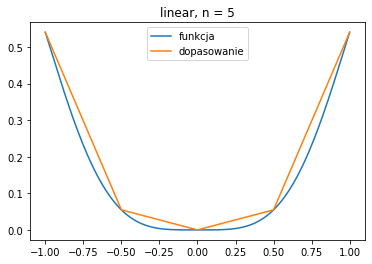

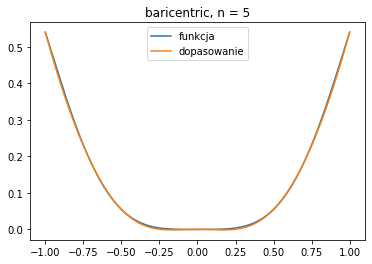

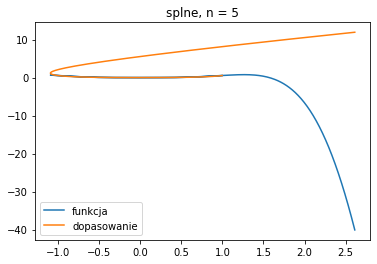

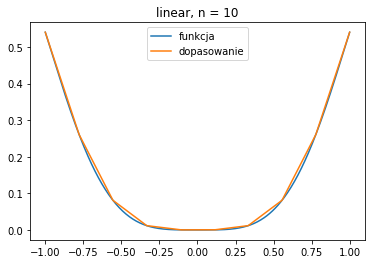

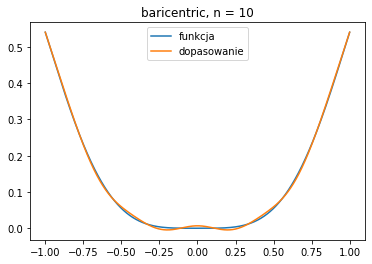

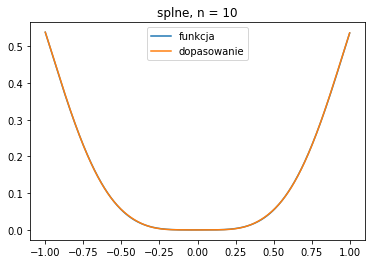

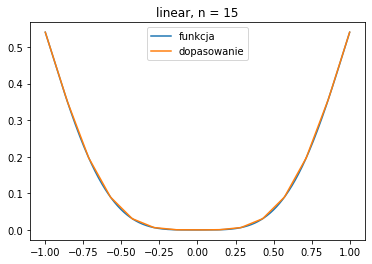

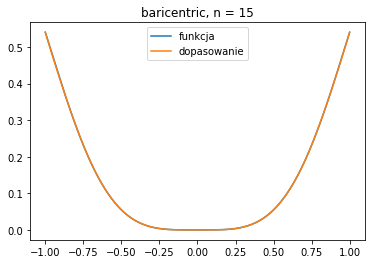

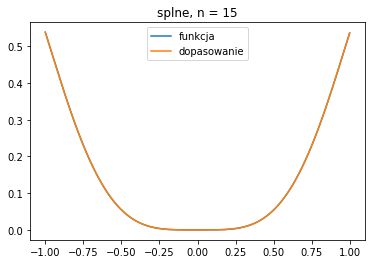

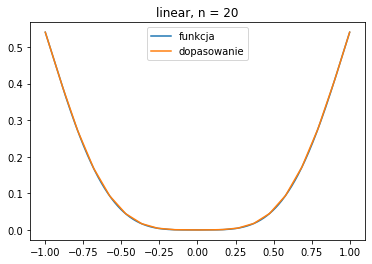

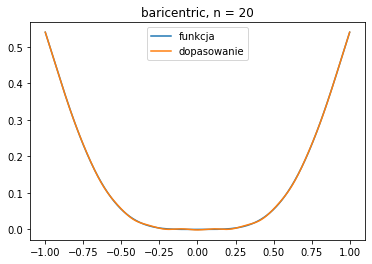

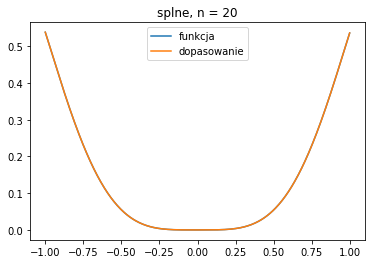

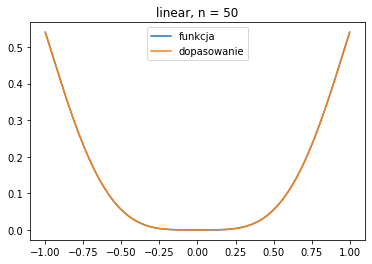

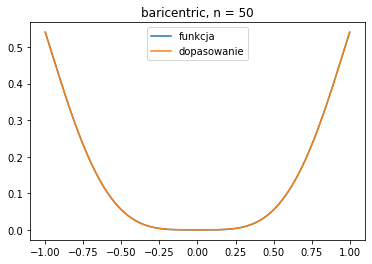

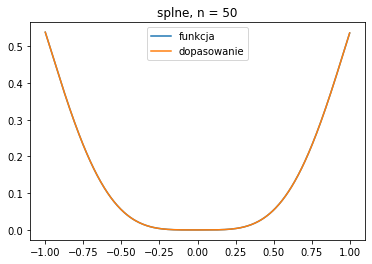

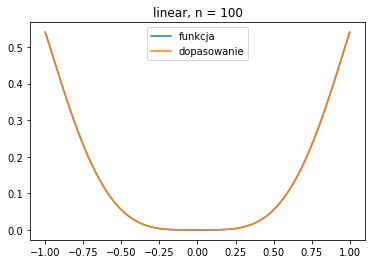

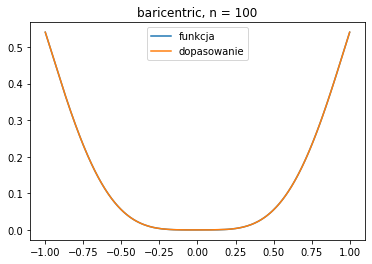

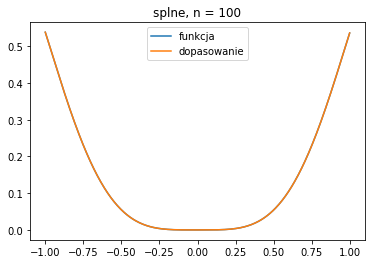

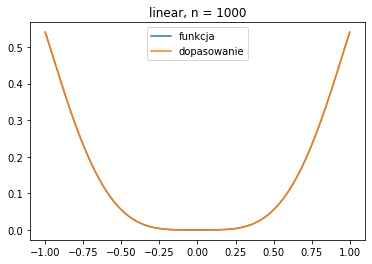

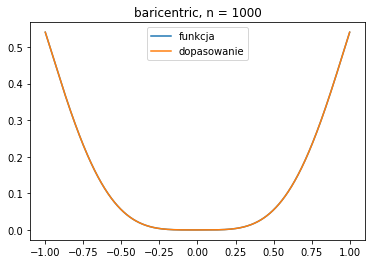

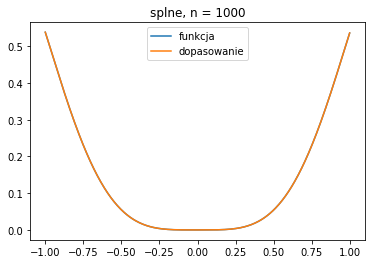

In [16]:
#TODO jeden splain jest zły
#TODO jak rysować splain
fun = lambda x: np.cos(x)*x**4
names = ['linear', 'baricentric', 'splne']
functions = [lin_interp, bar_interp, scipy_interp]

for n in [5, 10, 15, 20, 50, 100, 1000]:
    for i in range(3):
        s_time = %timeit -r 1 -n 1 -o functions[i](n,fun)
        print(f'metoda = {names[i]}\n',
              f'n = {n}\n'
              f'czas wykonania interpolacji = {s_time.average} s\n',
        'zużycie pamięci:')
        %memit functions[i](n,fun)
        x,y = functions[i](n,fun)
        x = np.array(x)
        # if i ==1:
        #     print(y,fun(x))
        norma = main.L_inf(y,fun(x))
        print(f'norma = {norma}')
        print(50*'-')
        plt.plot(x,fun(x))
        plt.plot(x,y)
        plt.legend(['funkcja','dopasowanie'])
        plt.title(f'{names[i]}, n = {n}')
        plt.show()
    print(60*'#')

***Zadanie 4.***  
Zaimplementuj funkcję interpolującą sklejaną trzeciego rzędu (splajn kubiczny). Jako dane wejściowe dane są dwa wektory: argumentów oraz wartości funkcji. Funkcja ma zwracać współczynniki funkcji wielomianowych w poszczególnych przedziałach.

***Podpowiedź***

wprowadzimy następujące zmienne:

$b_0 = y_k$

$b_1 = d_k - \frac{h_k}{6}(2m_k+m_{k+1})$

$b_2 = \frac{m_k}{2}$

$b_3 = \frac{m_{k+1}-m_k}{6h_k}$

gdzie:

$h_k = x_{k+1} - x_k$

$d_k = y_{k+1} - y_k$

$m_k = 3\frac{d_k-d_{k-1}}{h_{k-1}+h_k} - \frac{m_{k-1}*\rho_k}{2}-\frac{m_{k+1}*\lambda_k}{2}$

$\lambda_k = \frac{h_k}{h_{k-1}+h_k}$

$\rho_k = \frac{h_{k-1}}{h_{k-1}+h_k}$

dzieki temi współczynniki możemy wyznaczyć w następującyu sposób:

$a_3 = b_3$

$a_2 = b_2 - 3*b_3*x_k$

$a_1 = b1 - 2*b_2*x_k + 3*b_3*x_k*x_k$

$a_0 = b_0 - b_1*x_k + b_2*x_k*x_k - b_3*x_k*x_k*x_k$

Do wyznaczenia $m_0$ oraz $m_n$ wykorzystujemy metodę ograniczeń naturalnych i przyjmujemy te wartości jako zerowe.
Jako wektor $m_k$ przyjmij początkowo zera np.zeros.

***Przykład***

In [ ]:
# x=np.array([1,2,3])
# y=np.array([5,7,6])
#
#
# a0,a1,a2,a3 = main.cubic_spline(x,y)
# f = [[a0[i],a1[i],a2[i],a3[i]] for i in range(len(a))]
#
#
# for i in range(len(x)-1):
#     x_new = np.linspace(x[i], x[i+1],1000)
#     plt.plot(x_new, PolyCoefficients(x_new, f[i]))

In [4]:
def splain_coef(x, y) ->[list, list]:
    """
    interpolacja liniowa pierwszego stopnia
    :param x: iksy
    :param y: ygreki
    :return: współczynniki a i współczynniki b
    """

    a = []
    d = []
    h = []
    m = [0 for _ in range(len(x))]
    m.extend([0])


    # uwaga na indeksacje
    for i in range(0,len(x)-1):
        h.append(x[i+1] - x[i])
        d.append((y[i + 1] - y[i])/h[i])

    for i in range(1,len(x)-1):
        lam = h[i] / (h[i-1] + h[i])
        p = h[i-1] / (h[i-1] + h[i])
        m[i] = 3 * (d[i] - d[i-1]) / (h[i-1] + h[i])  -  (m[i-1] * p) / 2 - m[i+1] * lam/2
        b0 = y[i]
        b1 = d[i] - h[i] * (2 * m[i] - m[i+1])/6
        b2 = m[i]/2
        b3 = (m[i+1] - m[i]) / 6 * h[i]
        a0 = b0 - b1 * x[i] + b2 * x[i]**2 - b3 * x[i]**3
        a1 = b1 - 2 * b2 * x[i] + 3 * b3 * x[i]**2
        a2 = b2 - 3 * b3 * x[i]
        a3 = b3
        a.append([a0,a1,a2,a3])
    return a


def splain_interp(n, fun):
    x = np.linspace(-1,1,n)
    y = fun(x)
    a_s = splain_coef(x,y)
    out_x = []
    y_lin =[]
    for i in range(len(a_s)-1):
        x_new = np.linspace(x[i], x[i+1],500)
        out_x.extend(x_new)
        # print(len(x_new),len(a_s),i)
        y_lin.extend(PolyCoefficients(x_new, a_s[i]))
    return out_x, y_lin

***Zadania 5.***  
Korzystając z funkcji z pakietu [scipy.interpolate.splprep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep), funkcji zaimplementowanej w Zadaniu 4: 
    
### $ f(x) = \frac{1}{25x^2+1}$

W przedziale \[-1, 1\]

dla różnych ilości wartości węzłów: 50, 100, 1000

Dokonaj porównania wyników otrzymanych:  
Wykorzystując funkcję z ubiegłego tygodnia, ocenić jakość interpolacji funkcji spline pierwszego stopnia z wartościami danej funkcji.
Sprawdź czas wykonywania się poszczególnych elementów oraz ilość pamięci użytej 

6.76 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
metoda = my_spline
 n = 50
czas wykonania interpolacji = 0.006758699999998896 s
 zużycie pamięci:
peak memory: 98.12 MiB, increment: 1.38 MiB
norma = 0.007526995409054771
--------------------------------------------------
748 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
metoda = scipy_spline
 n = 50
czas wykonania interpolacji = 0.0007478000000062934 s
 zużycie pamięci:
peak memory: 100.14 MiB, increment: 0.02 MiB
norma = 0.012417238057527036
--------------------------------------------------
############################################################
20 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
metoda = my_spline
 n = 100
czas wykonania interpolacji = 0.020023700000002975 s
 zużycie pamięci:
peak memory: 103.38 MiB, increment: 3.73 MiB
norma = 0.0009545609448793346
--------------------------------------------------
472 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
metoda = 

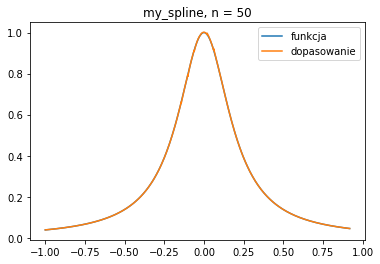

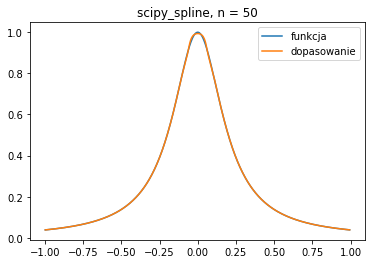

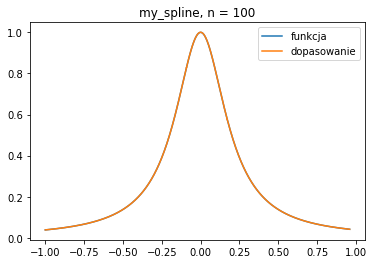

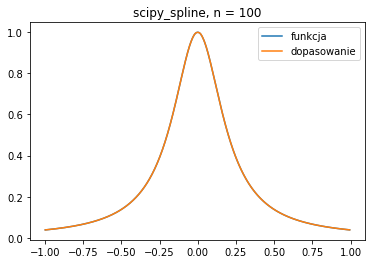

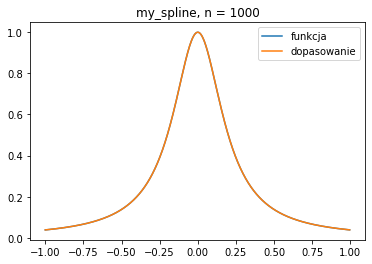

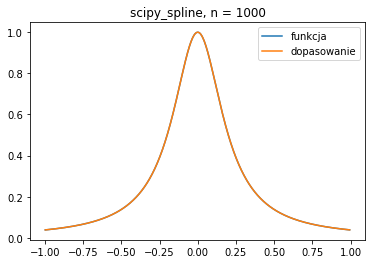

In [5]:
# fun = lambda x: np.cos(x)*x**4
fun = lambda x: 1/(25 * x**2 +1)
names = ['my_spline','scipy_spline']
functions = [splain_interp,scipy_interp]

for n in [50, 100, 1000]:
    for i in range(2):
        s_time = %timeit -r 1 -n 1 -o functions[i](n,fun)
        print(f'metoda = {names[i]}\n',
              f'n = {n}\n'
              f'czas wykonania interpolacji = {s_time.average} s\n',
        'zużycie pamięci:')
        %memit functions[i](n,fun)
        x,y = functions[i](n,fun)
        x = np.array(x)
        # if i ==1:
        #     print(y,fun(x))
        norma = main.L_inf(y,fun(x))
        print(f'norma = {norma}')
        print(50*'-')
        plt.plot(x,fun(x))
        plt.plot(x,y)
        plt.legend(['funkcja','dopasowanie'])
        plt.title(f'{names[i]}, n = {n}')
        plt.show()
    print(60*'#')

***Zadanie 6.***  
Korzystając z funkcji z pakietu [scipy.interpolate.splprep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep), funkcji zaimplementowanej w Zadaniu 4: 
    
### $ f(x) = cos(x)x^4$

W przedziale \[-1, 1\]

dla różnych ilości wartości węzłów: 50, 100, 1000

Dokonaj porównania wyników otrzymanych:  
Wykorzystując funkcję z ubiegłego tygodnia, ocenić jakość interpolacji funkcji spline pierwszego stopnia z wartościami danej funkcji.
Sprawdź czas wykonywania się poszczególnych elementów oraz ilość pamięci użytej 

7.37 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
metoda = my_spline
 n = 50
czas wykonania interpolacji = 0.00736979999999221 s
 zużycie pamięci:
peak memory: 178.04 MiB, increment: 0.89 MiB
norma = 0.0002925975205587683
--------------------------------------------------
528 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
metoda = scipy_spline
 n = 50
czas wykonania interpolacji = 0.0005279000000655287 s
 zużycie pamięci:
peak memory: 141.12 MiB, increment: 0.02 MiB
norma = 6.178451937066676e-06
--------------------------------------------------
############################################################
15.8 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
metoda = my_spline
 n = 100
czas wykonania interpolacji = 0.015780800000015915 s
 zużycie pamięci:
peak memory: 142.66 MiB, increment: 0.05 MiB
norma = 5.051894931962231e-05
--------------------------------------------------
393 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
metod

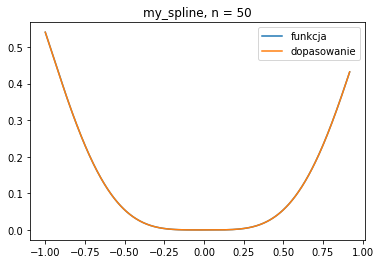

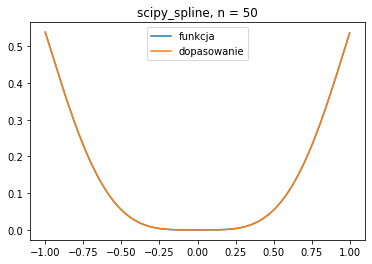

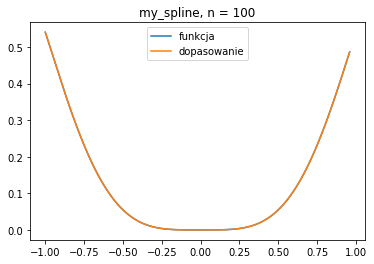

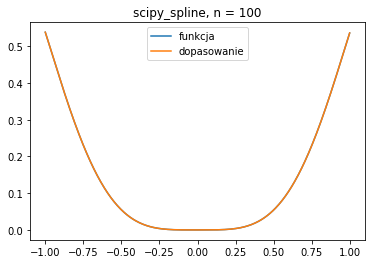

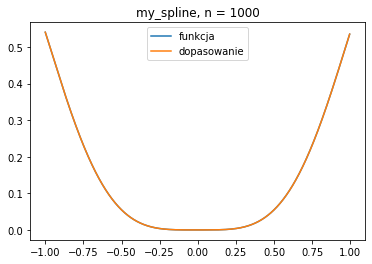

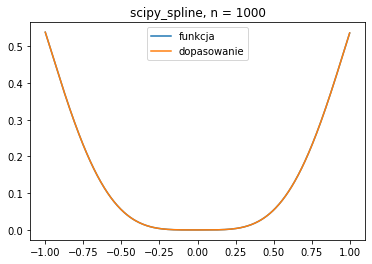

In [17]:
fun = lambda x: np.cos(x)*x**4
names = ['my_spline','scipy_spline']
functions = [splain_interp,scipy_interp]

for n in [50, 100, 1000]:
    for i in range(2):
        s_time = %timeit -r 1 -n 1 -o functions[i](n,fun)
        print(f'metoda = {names[i]}\n',
              f'n = {n}\n'
              f'czas wykonania interpolacji = {s_time.average} s\n',
        'zużycie pamięci:')
        %memit functions[i](n,fun)
        x,y = functions[i](n,fun)
        x = np.array(x)
        # if i ==1:
        #     print(y,fun(x))
        norma = main.L_inf(y,fun(x))
        print(f'norma = {norma}')
        print(50*'-')
        plt.plot(x,fun(x))
        plt.plot(x,y)
        plt.legend(['funkcja','dopasowanie'])
        plt.title(f'{names[i]}, n = {n}')
        plt.show()
    print(60*'#')

***Zadanie 7.***  
Dla funkcji:
### $f(x) = |sin(5x)|^3$

Porównać działanie funkcji zaimplementowanych w Zadaniu 1 oraz 4 dla różnych ilości wartości węzłów: 50, 100, 1000 oraz przedstawić wyniki na odpowiednich wykresach.



2.15 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
metoda = my_linear_spline
 n = 50
czas wykonania interpolacji = 0.002147200000081284
 zużycie pamięci:
peak memory: 177.77 MiB, increment: 0.02 MiB
norma = 0.015500188094066836
8.17 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
metoda = my_spline
 n = 50
czas wykonania interpolacji = 0.008172099999910643
 zużycie pamięci:
peak memory: 142.66 MiB, increment: 0.05 MiB
norma = 0.029800468804840774
5.46 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
metoda = my_linear_spline
 n = 100
czas wykonania interpolacji = 0.005457700000079058
 zużycie pamięci:
peak memory: 141.02 MiB, increment: 0.28 MiB
norma = 0.003802743359549665
13.6 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
metoda = my_spline
 n = 100
czas wykonania interpolacji = 0.013596100000086153
 zużycie pamięci:
peak memory: 142.33 MiB, increment: 1.62 MiB
norma = 0.006707074343051178
39.4 ms ± 0 ns per loop (mean ± std. dev. of

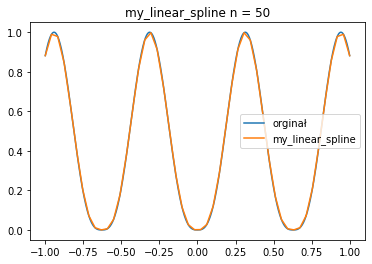

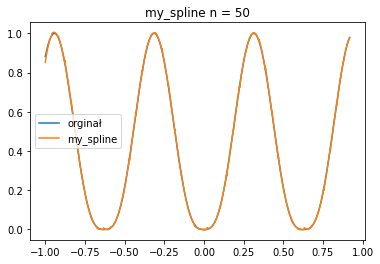

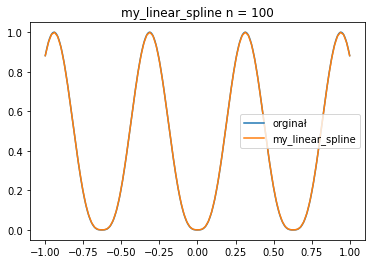

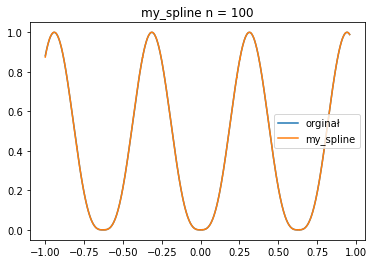

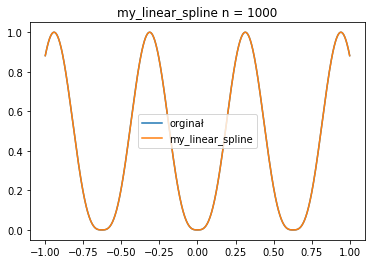

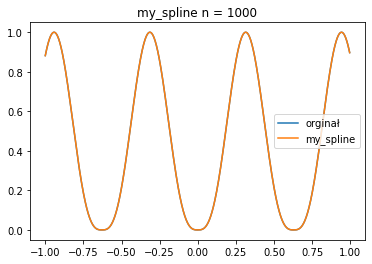

In [20]:
#TODO sprawdzić
fun = lambda x: np.abs(np.sin(np.multiply(5,x)))**3
names = ['my_linear_spline','my_spline']
functions = [lin_interp, splain_interp]

for n in [50, 100, 1000]:
    plt.figure()
    for i in range(2):
        s_time = %timeit -r 1 -n 1 -o functions[i](n,fun)
        print(f'metoda = {names[i]}\n',
              f'n = {n}\n'
              f'czas wykonania interpolacji = {s_time.average}\n',
        'zużycie pamięci:')
        %memit functions[i](n,fun)
        x,y = functions[i](n,fun)
        # a = fun(x)
        norma = main.L_inf(y,fun(x))
        print(f'norma = {norma}')
        plt.plot(x,fun(x))
        plt.plot(x,y)
        plt.legend(['orginał',names[i]])
        plt.title(f'{names[i]} n = {n}')
        plt.show()